# Прогнозирование оттока клиентов телеком

## 1. Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### 1.1. Описание услуг

Оператор предоставляет два основных типа услуг:
1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### 1.2. Описание данных

Данные состоят из файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.

personal_new.csv - персональные данные клиента:
- gender – пол
- SeniorCitizen – пенсионный статус по возрасту
- Partner – наличие супруга/супруги
- Dependents – наличие иждивенцев

contract_new.csv - информация о договоре:
- BeginDate – дата начала пользования услугами
- EndDate – дата окончания пользования услугами
- Type – тип договора: ежемесячный, годовой и т.д.
- PaperlessBilling – выставления счёта по электронной почте
- PaymentMethod – способ оплаты
- MonthlyCharges – ежемесячные траты на услуги
- TotalCharges – всего потрачено денег на услуги

internet_new.csv – информация об интернет-услугах:
- InternetService – наличие услуг Интернет
- OnlineSecurity – межсетевой экран
- OnlineBackup – облачное хранилище файлов для резервного копирования данных
- DeviceProtection – антивирус
- TechSupport – выделенная линия технической поддержки
- StreamingTV – онлайн-ТВ
- StreamingMovies – онлайн-кинотеатр

phone_new.csv - информация об услугах телефонии:
- MultipleLines – возможность подключения телефонного аппарата к нескольким линиям одновременно

### 1.3. Цель проекта

Провести исследование с целью построения модели машинного обучения, которая поможет прогнозировать отток клиентов.

Результаты исследования позволят оператору связи выяснить, каким пользователям нужно будет предлагать промокоды и специальные условия.

### 1.4. Описание задачи

- Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов.
- Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия.
- Команда оператора собрала обезличенные данные о некоторых клиентах, информацию об их тарифах и пакетах услуг.

### 1.5. План работы

1. Описание проекта:
   - Описание услуг.
   - Описание данных.
   - Цель проекта.
   - Описание задачи.
   - План работы.

2. Исследование данных:
   - Размеры таблиц.
   - Уникальные значения.
   - Пропуски.
   - Дубликаты.

3. Анализ данных и подготовка признаков:
   - Объединение выборок.
   - Целевой признак.
   - Заполнение пропусков.
   - Изменение типов данных.
   - Преобразование признаков.
   - Исследование и визуализация признаков.
   
4. Построение и обучение моделей:
   - Разделение данных на выборки.
   - Построение и обучение моделей. 
   - Подбор гиперпараметров.
   - Выбор лучшей модели.
   
5. Тестирование лучшей модели.
6. Общий вывод.
7. Отчёт.

## 2. Исследование данных

In [1]:
#!pip install scikit-learn==1.1.3
!pip install phik
!pip3 install xgboost
#!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate, GridSearchCV, KFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from phik.report import plot_correlation_matrix
RANDOM_STATE = 310723
TEST_SIZE = 0.25

###  2.1. Информация о договоре

In [3]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv')
except:
    contract = pd.read_csv('D:/Yandex/contract_new.csv')

In [4]:
display(contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

In [5]:
contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [6]:
contract.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3720,1097-FSPVW,2016-08-01,No,Month-to-month,No,Credit card (automatic),54.55,2291.1
3469,9402-ORRAH,2018-11-01,No,Month-to-month,Yes,Electronic check,91.50,1372.5
4443,2672-OJQZP,2020-01-01,No,Month-to-month,No,Mailed check,44.75,46.09
2402,7623-HKYRK,2019-08-01,No,Month-to-month,No,Mailed check,19.70,130.02
3942,6959-UWKHF,2019-12-01,No,Month-to-month,Yes,Electronic check,42.90,85.8


In [7]:
contract.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [8]:
contract.tail(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.2
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.4
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.6
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.8
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,7251.82


In [9]:
len(contract['customerID'].unique())

7043

In [10]:
display(len(contract['BeginDate'].unique()))
contract['BeginDate'].unique()

77

array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

In [11]:
display(len(contract['EndDate'].unique()))
display(contract['EndDate'].unique())

67

array(['No', '2017-05-01', '2016-03-01', '2018-09-01', '2018-11-01',
       '2018-12-01', '2019-08-01', '2018-07-01', '2017-09-01',
       '2015-09-01', '2016-07-01', '2016-06-01', '2018-03-01',
       '2019-02-01', '2018-06-01', '2019-06-01', '2020-01-01',
       '2019-11-01', '2016-09-01', '2015-06-01', '2016-12-01',
       '2019-05-01', '2019-04-01', '2017-06-01', '2017-08-01',
       '2018-04-01', '2018-08-01', '2018-02-01', '2019-07-01',
       '2015-12-01', '2014-06-01', '2018-10-01', '2019-01-01',
       '2017-07-01', '2017-12-01', '2018-05-01', '2015-11-01',
       '2019-10-01', '2019-03-01', '2016-02-01', '2016-10-01',
       '2018-01-01', '2017-11-01', '2015-10-01', '2019-12-01',
       '2015-07-01', '2017-04-01', '2015-02-01', '2017-03-01',
       '2016-05-01', '2016-11-01', '2015-08-01', '2019-09-01',
       '2017-10-01', '2017-02-01', '2016-08-01', '2016-04-01',
       '2015-05-01', '2014-09-01', '2014-10-01', '2017-01-01',
       '2015-03-01', '2015-01-01', '2016-01-01', 

In [12]:
display(len(contract['Type'].unique()))
display(contract['Type'].unique())

3

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [13]:
display(len(contract['PaperlessBilling'].unique()))
display(contract['PaperlessBilling'].unique())

2

array(['Yes', 'No'], dtype=object)

In [14]:
display(len(contract['PaymentMethod'].unique()))
display(contract['PaymentMethod'].unique())

4

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [15]:
display(len(contract['MonthlyCharges'].unique()))

1585

In [16]:
display(len(contract['TotalCharges'].unique()))

6658

In [17]:
contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [18]:
contract.duplicated().sum()

0

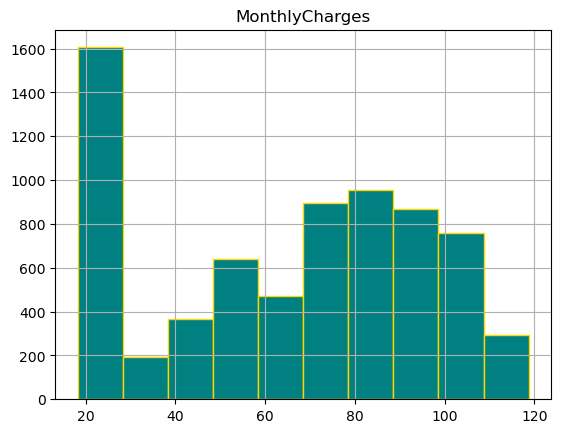

In [19]:
contract.hist(color='teal', edgecolor = 'gold');

###  2.2. Персональные данные клиента

In [20]:
try:
    personal = pd.read_csv('/datasets/personal_new.csv')
except:
    personal = pd.read_csv('D:/Yandex/personal_new.csv')

In [21]:
display(personal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

In [22]:
personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [23]:
personal.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
5298,5647-FXOTP,Female,1,Yes,No
5577,4163-HFTUK,Male,0,No,No
5039,4713-LZDRV,Female,1,No,No
3873,7340-KEFQE,Female,0,Yes,Yes
6607,7242-QZLXF,Male,0,No,Yes


In [24]:
personal.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [25]:
personal.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


In [26]:
display(len(personal['customerID'].unique()))

7043

In [27]:
display(len(personal['gender'].unique()))
display(personal['gender'].unique())

2

array(['Female', 'Male'], dtype=object)

In [28]:
display(len(personal['SeniorCitizen'].unique()))
display(personal['SeniorCitizen'].unique())

2

array([0, 1], dtype=int64)

In [29]:
display(len(personal['Partner'].unique()))
display(personal['Partner'].unique())

2

array(['Yes', 'No'], dtype=object)

In [30]:
display(len(personal['Dependents'].unique()))
display(personal['Dependents'].unique())

2

array(['No', 'Yes'], dtype=object)

In [31]:
personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [32]:
personal.duplicated().sum()

0

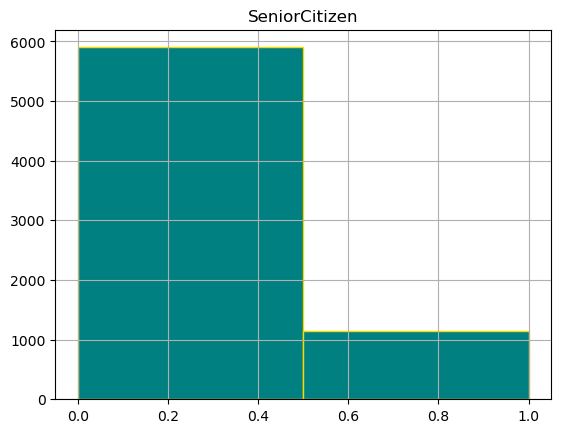

In [33]:
personal.hist(color='teal', bins=2, edgecolor = 'gold');

###  2.3. Информация об интернет-услугах

In [34]:
try:
    internet = pd.read_csv('/datasets/internet_new.csv')
except:
    internet = pd.read_csv('D:/Yandex/internet_new.csv')

In [35]:
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

In [36]:
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [37]:
internet.sample(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4353,6918-UMQCG,Fiber optic,No,No,No,No,Yes,No
1153,6890-PFRQX,DSL,Yes,No,Yes,No,Yes,No
3195,0628-CNQRM,DSL,Yes,No,Yes,Yes,Yes,No
268,2739-CACDQ,Fiber optic,No,No,Yes,No,No,No
2088,4328-VUFWD,DSL,No,No,No,Yes,No,Yes


In [38]:
internet.head(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [39]:
internet.tail(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No
5516,3186-AJIEK,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


In [40]:
display(len(internet['customerID'].unique()))

5517

In [41]:
display(len(internet['InternetService'].unique()))
display(internet['InternetService'].unique())

2

array(['DSL', 'Fiber optic'], dtype=object)

In [42]:
display(len(internet['OnlineSecurity'].unique()))
display(internet['OnlineSecurity'].unique())

2

array(['No', 'Yes'], dtype=object)

In [43]:
display(len(internet['OnlineBackup'].unique()))
display(internet['OnlineBackup'].unique())

2

array(['Yes', 'No'], dtype=object)

In [44]:
display(len(internet['DeviceProtection'].unique()))
display(internet['DeviceProtection'].unique())

2

array(['No', 'Yes'], dtype=object)

In [45]:
display(len(internet['TechSupport'].unique()))
display(internet['TechSupport'].unique())

2

array(['No', 'Yes'], dtype=object)

In [46]:
display(len(internet['StreamingTV'].unique()))
display(internet['StreamingTV'].unique())

2

array(['No', 'Yes'], dtype=object)

In [47]:
display(len(internet['StreamingMovies'].unique()))
display(internet['StreamingMovies'].unique())

2

array(['No', 'Yes'], dtype=object)

In [48]:
internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [49]:
internet.duplicated().sum()

0

###  2.4. Информация об услугах телефонии

In [50]:
try:
    phone = pd.read_csv('/datasets/phone_new.csv')
except:
    phone = pd.read_csv('D:/Yandex/phone_new.csv')

In [51]:
display(phone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

In [52]:
phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


In [53]:
phone.sample(5)

,customerID,MultipleLines
5699,6615-ZGEDR,No
558,5240-CAOYT,Yes
2784,7503-EPSZW,Yes
5740,3323-CPBWR,Yes
4094,3530-VWVGU,No


In [54]:
phone.head(5)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [55]:
phone.tail(5)

,customerID,MultipleLines
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes
6360,3186-AJIEK,No


In [56]:
display(len(phone['customerID'].unique()))

6361

In [57]:
display(len(phone['MultipleLines'].unique()))
display(phone['MultipleLines'].unique())

2

array(['No', 'Yes'], dtype=object)

In [58]:
phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

In [59]:
phone.duplicated().sum()

0

###  2.5. Вывод

- Таблицы имеют разные размеры.
- Всего в выборке представлены договоры с 7043 клиентами, из которых используют интернет - 5517, используют телефон - 6361.
- В таблицах отсутствуют пропуски и явные дубликаты.
- Признаки MonthlyCharges и SeniorCitizen имеют числовой тип данных, остальные признаки имеют тип данных object.
- Все значения признака customerID - уникальны, что даёт возможность объединенить выбороки по этому признаку с использованием метода merge.

## 3. Анализ данных и подготовка признаков

### 3.1. Объединение выборок

In [60]:
data = contract.merge(personal, how='outer', on='customerID').merge(internet, how='outer', on='customerID')\
               .merge(phone, how='outer', on='customerID').reset_index(drop=True)
display(data.shape)
display(data.sample(5))

(7043, 20)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
1104,8717-VCTXJ,2016-08-01,No,One year,Yes,Mailed check,19.55,821.1,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4261,6195-MELTI,2015-05-01,No,One year,Yes,Mailed check,54.65,3115.05,Male,0,No,No,DSL,No,Yes,No,Yes,No,No,No
2957,2674-MIAHT,2019-10-01,No,Month-to-month,Yes,Mailed check,80.30,343.68,Female,0,No,No,Fiber optic,No,Yes,No,No,No,No,Yes
4582,6122-LJADA,2014-04-01,No,Two year,Yes,Credit card (automatic),90.15,6310.5,Male,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5674,3566-CAAYU,2014-10-01,2018-08-01,Two year,No,Electronic check,49.85,2453.62,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,No,Yes,NaN


### 3.2. Целевой признак

In [61]:
# Добавим в датасет категориальный целевой признак - customer_outflow, 
# который принимает значения 1 - клиент ушёл и 0 - клиент остался.
data['customer_outflow'] = data['EndDate'].copy()
data.loc[data['customer_outflow'] != 'No', 'customer_outflow'] = 1
data.loc[data['customer_outflow'] == 'No', 'customer_outflow'] = 0
data['customer_outflow'].sample(5)

3347    0
2992    0
4350    0
3681    1
638     1
Name: customer_outflow, dtype: object

In [62]:
data.shape

(7043, 21)

In [63]:
data['customer_outflow'].value_counts()

0    5942
1    1101
Name: customer_outflow, dtype: int64

Количество ушедших клиентов в 2,8 раза меньше, чем оставшихся. В качестве метрики мы будем использовать AUC-ROC, которая не чувствительна к дисбалансу классов.

In [64]:
data.set_index('customerID', inplace=True)
data.columns

Index(['BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MultipleLines', 'customer_outflow'],
      dtype='object')

In [65]:
data.shape

(7043, 20)

In [66]:
data.columns = ['Begin_Date', 'End_Date', 'Type', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charges', 'Total_Charges',\
                'gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Internet_Service', 'Online_Security', 'Online_Backup',\
                'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Multiple_Lines', 'customer_outflow']
data.columns = data.columns.str.lower()
data.sample(5)

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,customer_outflow
customerID,,,,,,,,,,,,,,,,,,,,
4918-QLLIW,2019-09-01,No,Month-to-month,No,Credit card (automatic),53.40,291.03,Male,0,No,No,DSL,No,No,No,No,Yes,No,No,0
3173-NVMPX,2019-05-01,No,Month-to-month,Yes,Mailed check,55.30,497.7,Female,0,Yes,Yes,DSL,No,Yes,No,No,No,No,Yes,0
2748-MYRVK,2014-10-01,2017-04-01,One year,No,Bank transfer (automatic),99.90,3266.73,Female,0,No,No,Fiber optic,No,Yes,No,No,Yes,Yes,Yes,1
0655-YDGFJ,2017-09-01,2019-10-01,Month-to-month,No,Bank transfer (automatic),48.95,1297.17,Male,0,No,No,DSL,No,No,Yes,No,No,No,No,1
1157-BQCUW,2019-10-01,No,Month-to-month,Yes,Electronic check,74.95,299.8,Male,0,No,No,Fiber optic,No,No,No,No,No,No,Yes,0


### 3.3. Заполнение пропусков

In [67]:
data.isna().sum()

begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
customer_outflow        0
dtype: int64

In [68]:
# Заменим эти пропуски значением No.
data = data.fillna('No')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   begin_date         7043 non-null   object 
 1   end_date           7043 non-null   object 
 2   type               7043 non-null   object 
 3   paperless_billing  7043 non-null   object 
 4   payment_method     7043 non-null   object 
 5   monthly_charges    7043 non-null   float64
 6   total_charges      7043 non-null   object 
 7   gender             7043 non-null   object 
 8   senior_citizen     7043 non-null   int64  
 9   partner            7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  internet_service   7043 non-null   object 
 12  online_security    7043 non-null   object 
 13  online_backup      7043 non-null   object 
 14  device_protection  7043 non-null   object 
 15  tech_support       7043 non-null   object 
 16  streaming_tv  

In [69]:
# Для No установим заглушку, соответствующую дате загрузке датасета - 2020-02-01.
data.loc[data['end_date'] == 'No', 'end_date'] = '2020-02-01'
data.sample(5)

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,customer_outflow
customerID,,,,,,,,,,,,,,,,,,,,
3707-GNWHM,2019-12-01,2020-02-01,Month-to-month,Yes,Mailed check,74.25,152.96,Male,0,No,No,Fiber optic,No,No,No,No,No,No,Yes,0
9365-SRSZE,2017-11-01,2020-02-01,Month-to-month,Yes,Electronic check,70.55,1904.85,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,No,0
6440-DKQGE,2017-08-01,2019-11-01,One year,No,Credit card (automatic),64.50,1776.33,Male,0,No,Yes,DSL,No,Yes,Yes,No,Yes,No,No,1
9659-ZTWSM,2014-08-01,2020-02-01,One year,Yes,Bank transfer (automatic),107.35,7368.5,Male,1,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes,0
6766-HFKLA,2015-06-01,2020-02-01,Two year,No,Bank transfer (automatic),103.20,5779.2,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,0


### 3.4. Изменение типов данных

In [70]:
# Категориальные признаки преобразуем в object.
data['senior_citizen'] = data['senior_citizen'].astype('object')
data['customer_outflow'] = data['customer_outflow'].astype('object')

In [71]:
# Преобразуем в числовой формат.
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')

In [72]:
# Преобразуем строки в даты.
data['begin_date'] = pd.to_datetime(data['begin_date'], format='%Y-%m-%d')
data['end_date'] = pd.to_datetime(data['end_date'], format='%Y-%m-%d')
print(data['begin_date'].dtypes)
print(data['end_date'].dtypes)

datetime64[ns]
datetime64[ns]


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   gender             7043 non-null   object        
 8   senior_citizen     7043 non-null   object        
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet_service   7043 non-null   object        
 12  online_security    7043 non-null   object        
 13  online_backup      7043 non-null   object        
 14

### 3.5. Преобразование признаков

In [74]:
# Добавим в датасет новый признак contract_duration - длительность договора. Преобразуем тип данных в integer.
data['contract_duration'] = data['end_date'] - data['begin_date']
data['contract_duration'] = pd.to_numeric(data['contract_duration'].dt.days, downcast='integer').astype(int)
data['contract_duration'].sample(5)

customerID
8883-ANODQ    2071
7716-YTYHG    1127
1735-XMJVH     245
4163-HFTUK    1553
4160-AMJTL     276
Name: contract_duration, dtype: int32

In [75]:
# Сохраним все численные признаки в numeric.
numeric = list(data.loc[:, data.dtypes == 'float'].columns.values) + list(data.loc[:, data.dtypes == 'int'].columns.values)
numeric

['monthly_charges', 'total_charges', 'contract_duration']

In [76]:
# Сохраним все категориальные признаки в categorical.
categorical = list(data.loc[:, data.dtypes == 'object'].columns.values)
categorical

['type',
 'paperless_billing',
 'payment_method',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines',
 'customer_outflow']

### 3.6. Исследование признаков

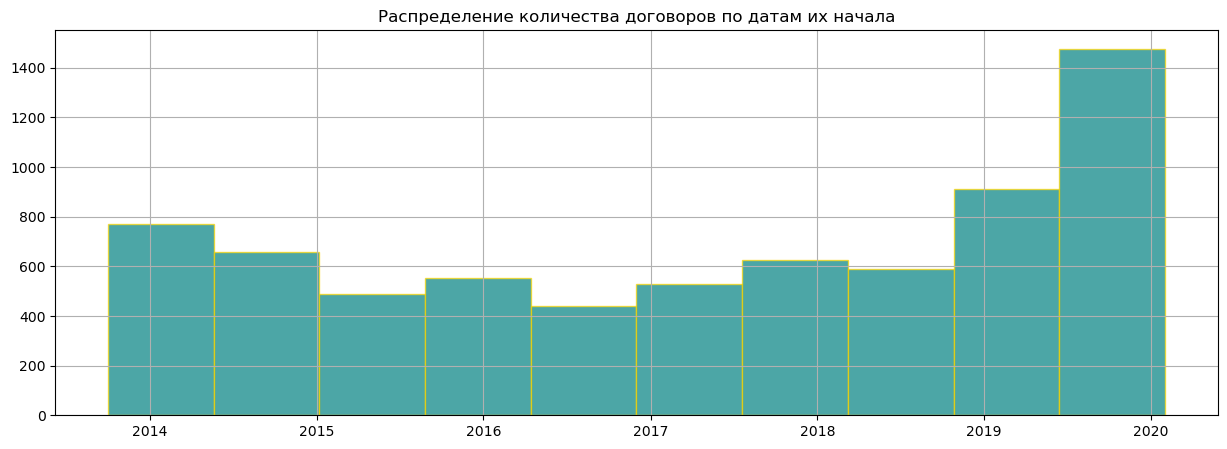

In [77]:
data['begin_date'].hist(figsize=(15, 5), alpha=0.7, color='teal', edgecolor = 'gold')
plt.grid(True)
plt.title('Распределение количества договоров по датам их начала')
plt.show();

С 2016 года увеличивается количество новых договоров.

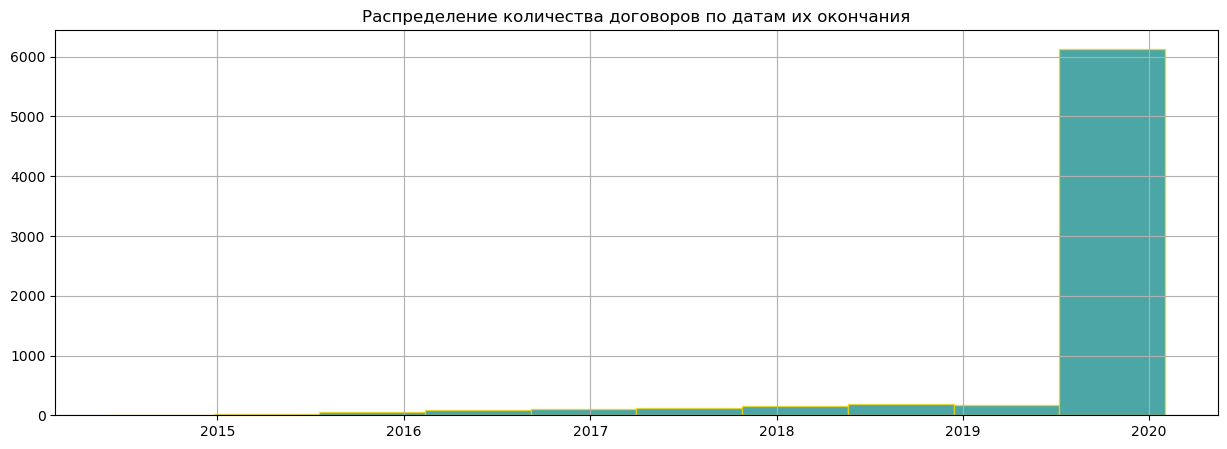

In [78]:
data['end_date'].hist(figsize=(15, 5), alpha=0.7, color='teal', edgecolor = 'gold')
plt.grid(True)
plt.title('Распределение количества договоров по датам их окончания')
plt.show();

Отток клиентов постоянно увеличивается.

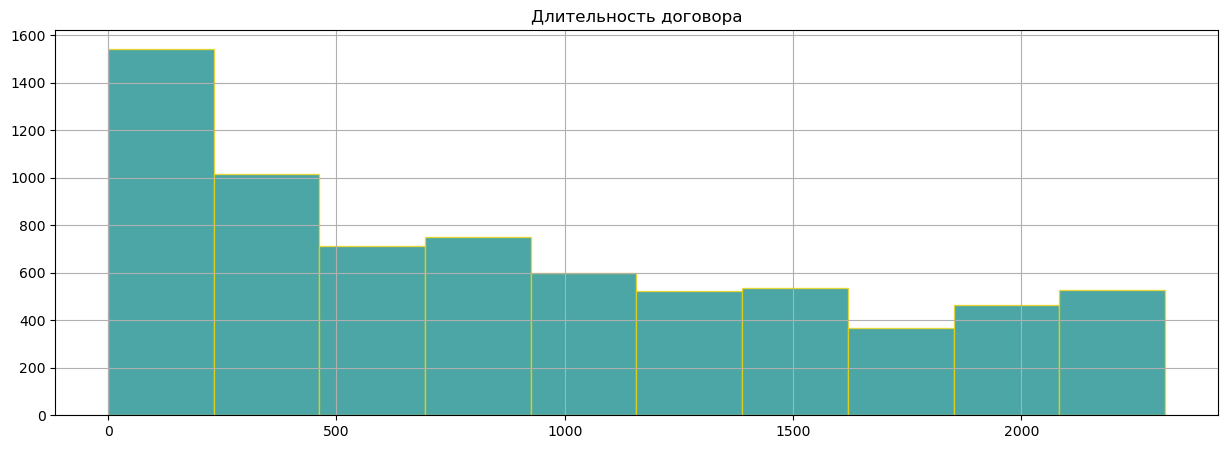

In [79]:
data['contract_duration'].hist(figsize=(15, 5), alpha=0.7, color='teal', edgecolor = 'gold')
plt.grid(True)
plt.title('Длительность договора')
plt.show();

Большое количество краткосрочных договоров.

Предположения:
- Возможно была запущена акция с выгодной ценой, но с повышением стоимости после определенного периода.
- Ухудшение условий - повышение стоимости или снижение качества предоставляемых услуг.

In [80]:
data[numeric].corr()

,monthly_charges,total_charges,contract_duration
monthly_charges,1.000000,0.630297,0.220054
total_charges,0.630297,1.000000,0.821442
contract_duration,0.220054,0.821442,1.000000


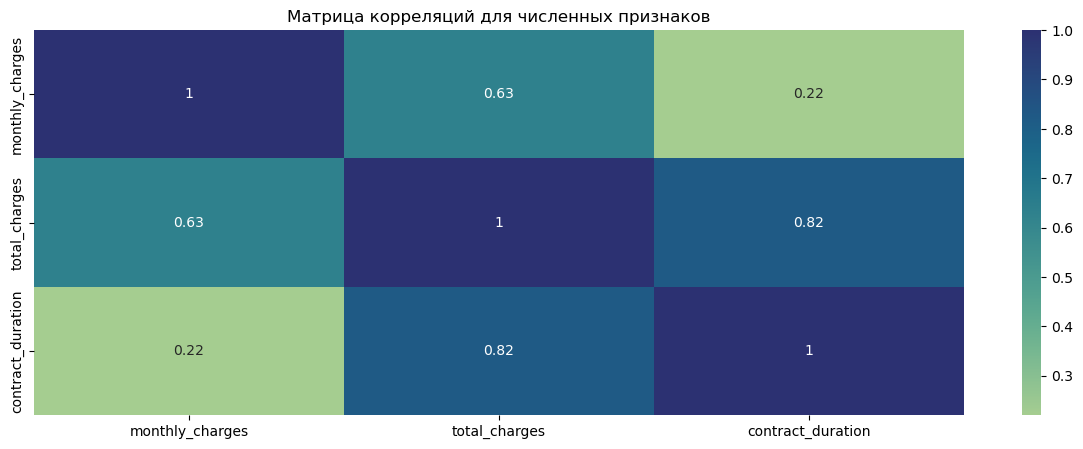

In [81]:
plt.figure(figsize=(15,5))
sns.heatmap(data[numeric].corr(), annot=True, cmap='crest')
plt.title('Матрица корреляций для численных признаков')
plt.show();

Сильная корреляция между признаками total_charges и contract_duration.

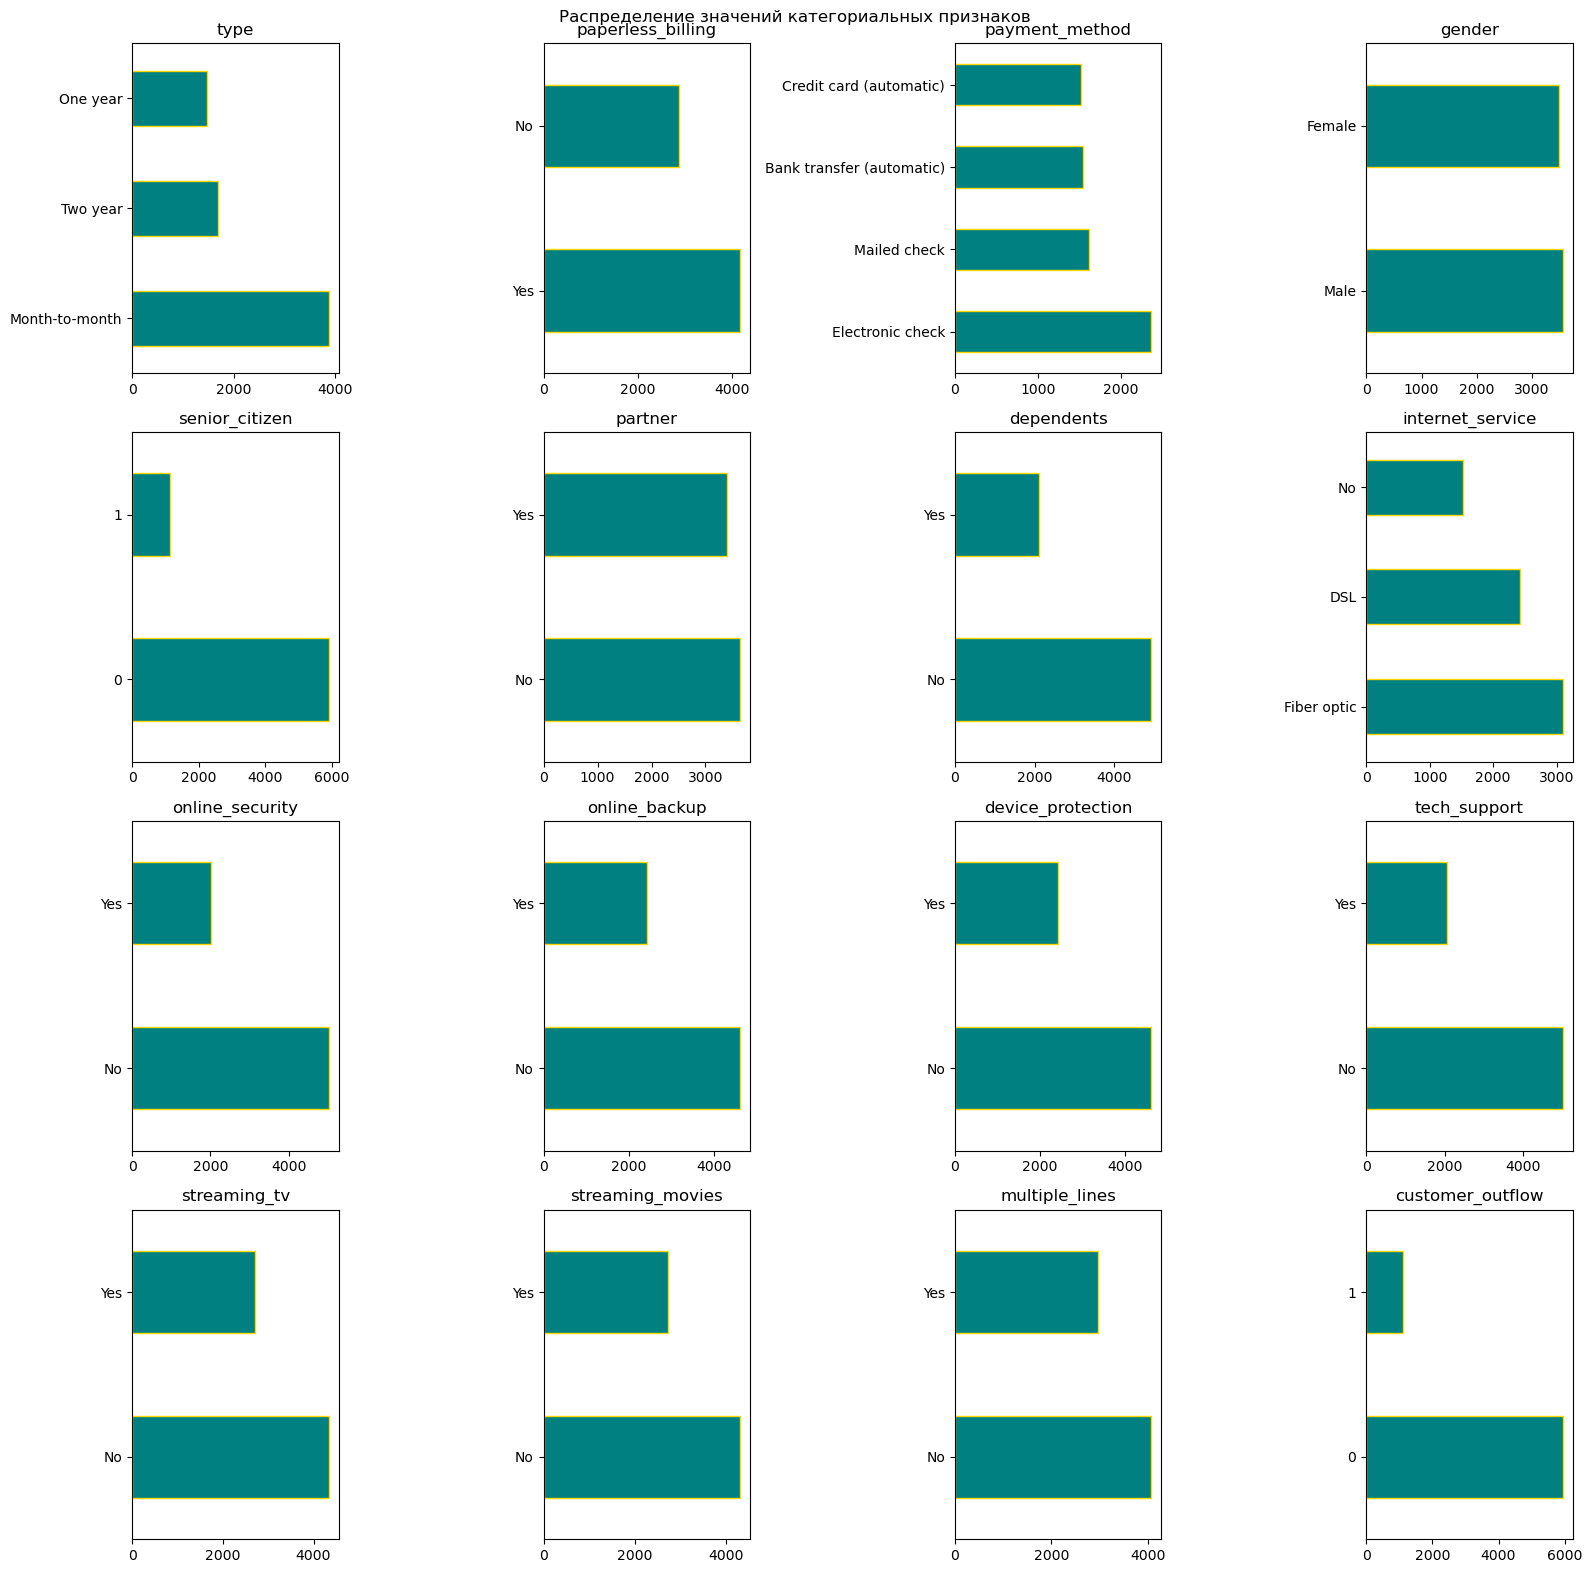

In [82]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16,16))
fig.suptitle('Распределение значений категориальных признаков')
axes = axs.ravel()
for i, column in enumerate(categorical):
    data[column].value_counts().plot(kind='barh', ax=axes[i], color='teal', edgecolor = 'gold')
    axes[i].set_title(column)
plt.tight_layout()
plt.show();

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'contract_duration']


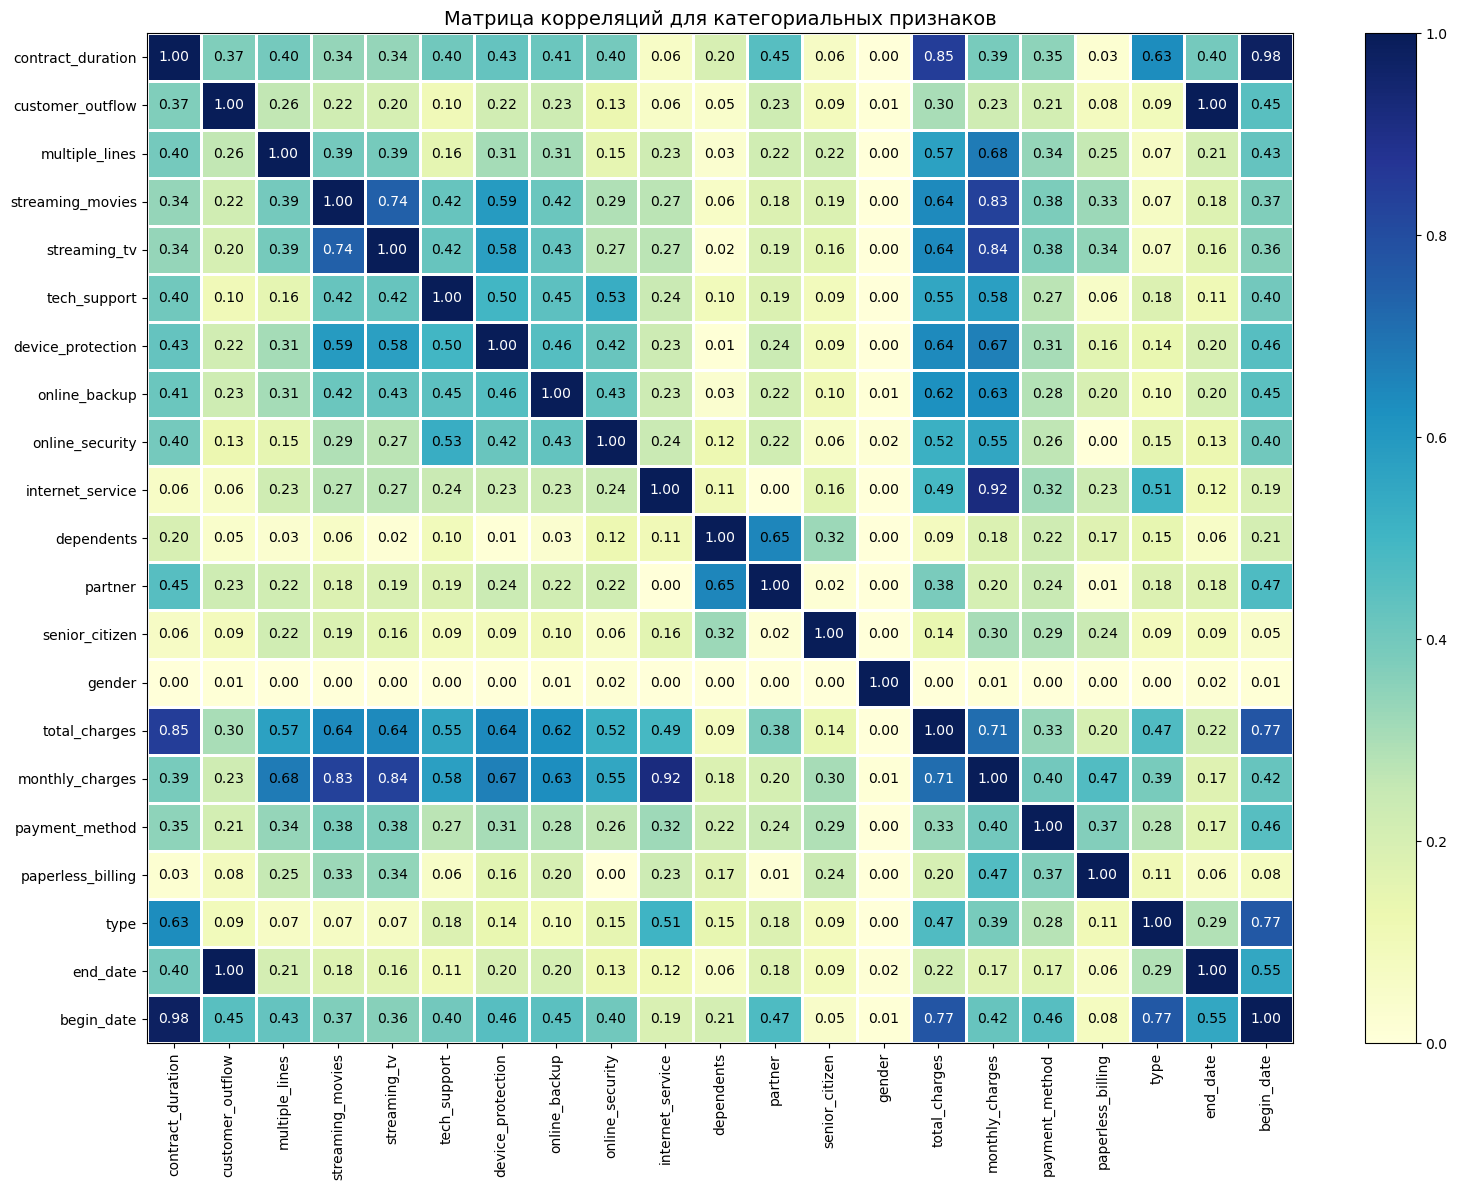

In [83]:
corr_matrix = data.phik_matrix()
plot_correlation_matrix(corr_matrix.values, x_labels=corr_matrix.columns, y_labels=corr_matrix.index, vmin=0, vmax=1, 
                        color_map="YlGnBu", title="Матрица корреляций для категориальных признаков", figsize=(16, 12))
plt.tight_layout();

У признака contract_duration имеется высокая корреляция с признаками total_charges и begin_date.

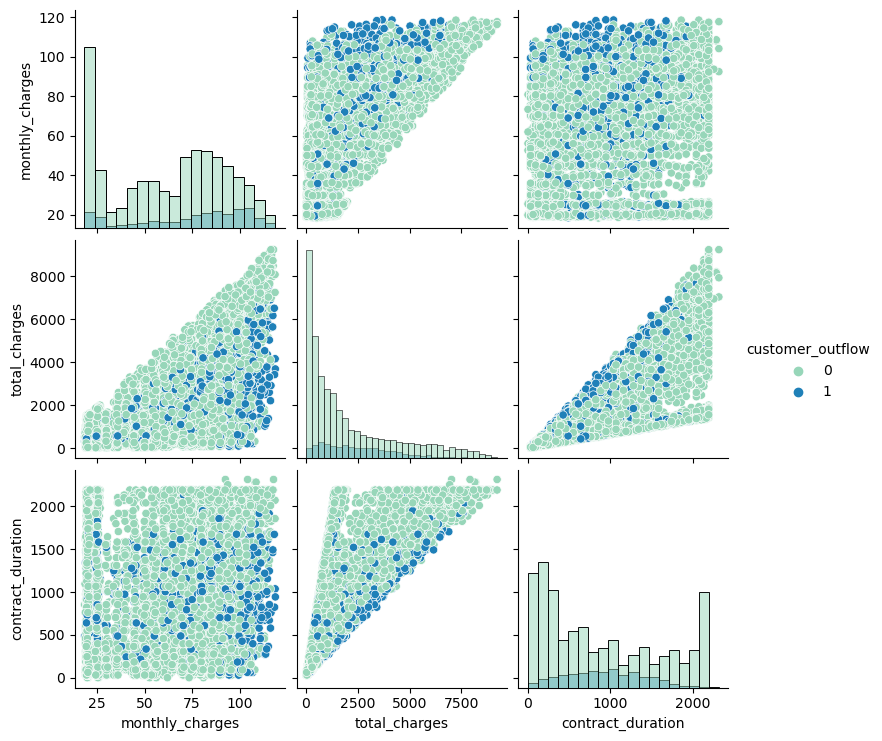

In [84]:
sns.pairplot(data, vars = numeric, hue = 'customer_outflow', diag_kind = 'hist', palette = 'YlGnBu');

Высокая мультиколлинеарность между признаками contract_duration и total_charges, а также между monthly_charges и total_charges.

In [85]:
# Удалим признаки которые имеют высокую корреляцию с contract_duration
data = data.drop(['begin_date', 'total_charges'], axis=1)

In [86]:
# Удалим end_date - этот признак мы заменили на customer_outflow.
data = data.drop(['end_date'], axis=1)

In [87]:
data.shape

(7043, 18)

interval columns not set, guessing: ['monthly_charges', 'contract_duration']


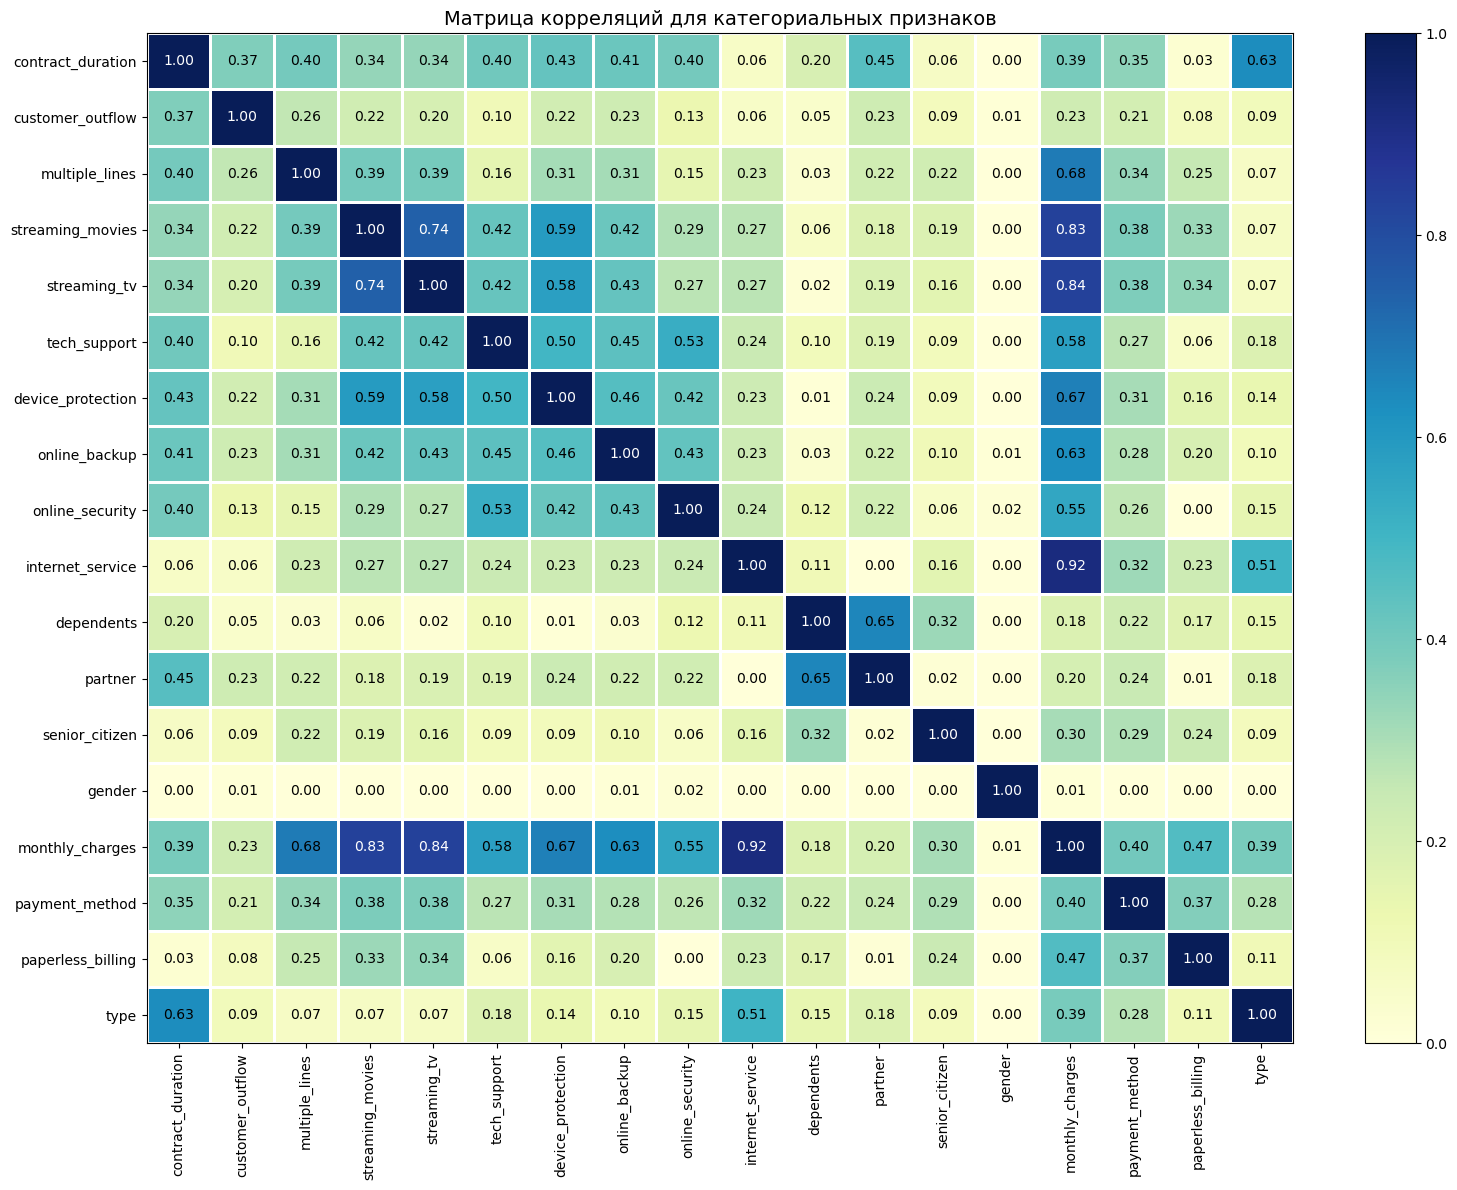

In [88]:
corr_matrix = data.phik_matrix()
plot_correlation_matrix(corr_matrix.values, x_labels=corr_matrix.columns, y_labels=corr_matrix.index, vmin=0, vmax=1, 
                        color_map="YlGnBu", title="Матрица корреляций для категориальных признаков", figsize=(16, 12))
plt.tight_layout();

Мультиколлинеарность признаков устранена.

### 3.7. Вывод

С 2016 года увеличивается количество новых договоров и отток клиентов. Предположения:
1. Возможно была запущена акция с выгодной ценой, но с повышением стоимости после определенного периода.
2. Ухудшение условий - повышение стоимости или снижение качества предоставляемых услуг при активном маркетинге.

- Выбороки объединены. 
- Признаки добавлены и удалены. 
- Признаки переименованы.
- Пропуски заполнены.
- Типы данных изменены.
- Признаки преобразованы.
- Исследованы численные и категориальные признаки.
- Удалены мультиколлинеарные признаки.
- Выявлен дисбаланс классов. В качестве основной метрики мы будем использовать AUC-ROC, которая не чувствительна к дисбалансу классов.
- Выявлены и удалены мультиколлинеарные признаки.

## 4. Построение и обучение моделей

### 4.1. Разделение данных на выборки

In [89]:
# Выделим из датасета целевой признак target и оставшиеся признаки features.
target = data['customer_outflow']
features = data.drop('customer_outflow', axis=1)

In [90]:
# Разделим полученые данные на обучающую и тестовую выборки.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=target)

In [91]:
# Сбросим индексы.
features_train = features_train.reset_index(drop=True)
features_test = features_test.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

## 4.2. Кодирование и масштабирование признаков

In [92]:
# Кодирование категориальных признаков.
categorical_2 = list(features_train.loc[:, data.dtypes == 'object'].columns.values)
features_train_ohe = features_train.copy()
features_test_ohe = features_test.copy()
encoder = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)

In [93]:
# Обучающая выборка.
encoded_train = pd.DataFrame(encoder.fit_transform(features_train_ohe[categorical_2]))
encoded_train.columns = encoder.get_feature_names_out()
features_train_ohe = features_train_ohe.join(encoded_train)
features_train_ohe.drop(categorical_2, axis = 1, inplace = True)
features_train_ohe.sample(5)

,monthly_charges,contract_duration,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_1,...,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
2724,69.25,92,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4733,53.85,1949,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1220,79.25,123,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2362,24.45,365,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3305,66.85,215,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [94]:
# Тестовая выборка.
encoded_test = pd.DataFrame(encoder.transform(features_test_ohe[categorical_2]))
encoded_test.columns = encoder.get_feature_names_out()
features_test_ohe = features_test_ohe.join(encoded_test)
features_test_ohe.drop(categorical_2, axis = 1, inplace = True)
features_test_ohe.sample(5)

,monthly_charges,contract_duration,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_1,...,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
278,30.85,396,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1417,79.45,1067,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
846,111.40,337,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
807,46.00,62,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
657,19.30,215,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# Масштабирование численных признаков.
numeric_2 = ['contract_duration', 'monthly_charges']
features_train_ohe_scaler = features_train_ohe.copy()
features_test_ohe_scaler = features_test_ohe.copy()
scaler = StandardScaler()
scaler.fit(features_train_ohe_scaler[numeric_2])
features_train_ohe_scaler[numeric_2] = scaler.transform(features_train_ohe_scaler[numeric_2])
features_test_ohe_scaler[numeric_2] = scaler.transform(features_test_ohe_scaler[numeric_2])
display(features_train_ohe_scaler.sample(5))
features_test_ohe_scaler.sample(5)

,monthly_charges,contract_duration,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_1,...,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
524,0.758178,-0.463445,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2035,-0.191877,1.233647,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3557,-0.099882,-1.223250,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4437,-0.352450,-1.268721,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4983,-0.193550,-0.954824,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


,monthly_charges,contract_duration,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_1,...,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
1390,-1.486495,-0.197954,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
837,-1.516602,-1.044300,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
903,-0.487933,-0.687866,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
540,1.372035,-0.063008,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
171,-0.359140,-1.044300,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
features_train_ohe_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         5282 non-null   float64
 1   contract_duration                       5282 non-null   float64
 2   type_One year                           5282 non-null   float64
 3   type_Two year                           5282 non-null   float64
 4   paperless_billing_Yes                   5282 non-null   float64
 5   payment_method_Credit card (automatic)  5282 non-null   float64
 6   payment_method_Electronic check         5282 non-null   float64
 7   payment_method_Mailed check             5282 non-null   float64
 8   gender_Male                             5282 non-null   float64
 9   senior_citizen_1                        5282 non-null   float64
 10  partner_Yes                             5282 non-null   floa

In [97]:
# Преобразуем тип данных в integer
target_train = target_train.astype(int)
target_test = target_test.astype(int)

## 4.3. Обучение моделей

In [98]:
kfold = KFold(n_splits=3, random_state=RANDOM_STATE, shuffle=True)

In [99]:
# Функция для обучения моделей.
def fit_model(estimator, param_grid, features_train, target_train):
    model = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kfold,
                         scoring=['roc_auc', 'accuracy'], refit='roc_auc')
    model.fit(features_train, target_train)
    best_index = model.best_index_
    best_roc_auc = round(model.best_score_, 2)
    best_accuracy = round(model.cv_results_['mean_test_accuracy'][best_index], 2)
    print(f'AUC-ROC: {best_roc_auc}')
    print(f'Accuracy: {best_accuracy}')
    print(f'Parameters: {model.best_params_}')
    return model.best_estimator_, best_roc_auc, best_accuracy

In [100]:
# DecisionTreeClassifier.
dt_parameters = Pipeline([('dt', DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=10))])
scores = cross_validate(dt_parameters, features_train_ohe_scaler, target_train,
                        scoring=['roc_auc', 'accuracy'], cv=kfold, return_train_score=True)
roc_auc_dt = scores['test_roc_auc'].mean()
accuracy_dt = scores['test_accuracy'].mean()
print('AUC-ROC:', f'{roc_auc_dt:.2f}')
print('Accuracy:', f'{accuracy_dt:.2f}')

AUC-ROC: 0.72
Accuracy: 0.84


In [101]:
# LogisticRegression.
lr_parameters = Pipeline([('lr', LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs'))])
scores = cross_validate(lr_parameters, features_train_ohe_scaler, target_train,
                        scoring=['roc_auc', 'accuracy'], cv=kfold, return_train_score=True)
roc_auc_lr = scores['test_roc_auc'].mean()
accuracy_lr = scores['test_accuracy'].mean()
print('AUC-ROC:', f'{roc_auc_lr:.2f}')
print('Accuracy:', f'{accuracy_lr:.2f}')

AUC-ROC: 0.77
Accuracy: 0.86


In [102]:
# RandomForestClassifier.
rf_parameters = {'max_depth': list(range(2, 10, 2)), 'n_estimators': list(range(50, 500, 50))}
rf_best_model = fit_model(estimator=RandomForestClassifier(random_state=RANDOM_STATE),
    param_grid=rf_parameters, features_train=features_train_ohe_scaler, target_train=target_train)

AUC-ROC: 0.83
Accuracy: 0.85
Parameters: {'max_depth': 8, 'n_estimators': 450}


In [115]:
# CatBoostClassifier.
#cb_parameters = {'max_depth': range(2, 10, 2), 'n_estimators': range(50, 500, 50)}
#cb_best_model = fit_model(estimator=CatBoostClassifier(random_state=RANDOM_STATE),
#    param_grid=cb_parameters, features_train=features_train_ohe_scaler, target_train=target_train)

In [104]:
# LGBMClassifier.
lgbm_parameters = {'max_depth': range(2, 10, 2), 'n_estimators': range(50, 500, 50)}
lgbm_best_model = fit_model(estimator=LGBMClassifier(random_state=RANDOM_STATE),
    param_grid=lgbm_parameters, features_train=features_train_ohe_scaler, target_train=target_train)

AUC-ROC: 0.89
Accuracy: 0.9
Parameters: {'max_depth': 4, 'n_estimators': 450}


In [105]:
# GradientBoostingClassifier.
gbc_parameters = {'max_depth': range(2, 10, 2), 'n_estimators': range(50, 500, 50)}
gbc_best_model = fit_model(estimator=GradientBoostingClassifier(random_state=RANDOM_STATE),
    param_grid=gbc_parameters, features_train=features_train_ohe_scaler, target_train=target_train)

AUC-ROC: 0.9
Accuracy: 0.9
Parameters: {'max_depth': 4, 'n_estimators': 450}


In [106]:
# XGBClassifier.
xgb_parameters = {'max_depth': range(2, 10, 2), 'n_estimators': range(50, 500, 50)}
xgb_best_model = fit_model(estimator=XGBClassifier(random_state=RANDOM_STATE),
    param_grid=xgb_parameters, features_train=features_train_ohe_scaler, target_train=target_train)

AUC-ROC: 0.91
Accuracy: 0.91
Parameters: {'max_depth': 2, 'n_estimators': 450}


### 4.3. Вывод

- Разделили данные на выборки.
- Масштабировали признаки.
- Построили и обучили модели.
- Подобрали гиперпараметры.
- В качестве лучшей модели выбрали XGBClassifier, так как значение метрики AUC-ROC у неё выше остальных.
- Лучшая модель XGBClassifier на обучающей выборке имеет следующие значения:
  - AUC-ROC = 0.91
  - Accuracy = 0.91
  - Параметры: max_depth = 2, n_estimators = 450

## 5. Тестирование лучшей модели

### 5.1. Проверка качества лучшей модели

In [107]:
# Проверим на тестовой выборке качество выбранной модели XGBClassifier.
probabilities_xgb_test = xgb_best_model[0].predict_proba(features_test_ohe_scaler)
probabilities_one_xgb_test = probabilities_xgb_test[:, 1]
roc_auc_xgb_test = roc_auc_score(target_test, probabilities_one_xgb_test)
predictions_xgb_test = xgb_best_model[0].predict(features_test_ohe_scaler)
accuracy_xgb_test = accuracy_score(target_test, predictions_xgb_test)
print('AUC-ROC лучшей модели XGBClassifier на тестовой выборке:', f'{roc_auc_xgb_test:.2f}')
print('Accuracy лучшей модели XGBClassifier на тестовой выборке:', f'{accuracy_xgb_test:.2f}')

AUC-ROC лучшей модели XGBClassifier на тестовой выборке: 0.92
Accuracy лучшей модели XGBClassifier на тестовой выборке: 0.91


### 5.2. Проверка модели на адекватность

In [108]:
# DummyClassifier.
dummy = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy.fit(features_train, target_train) 
probabilities_dummy = dummy.predict_proba(features_test_ohe_scaler)
probabilities_one_dummy = probabilities_dummy[:, 1]
roc_auc_dummy = roc_auc_score(target_test, probabilities_one_dummy)
predictions_dummy = dummy.predict(features_test_ohe_scaler)
accuracy_dummy = accuracy_score(target_test, predictions_dummy)
print(f'AUC-ROC наивного прогноза: {roc_auc_dummy:.2f}')
print(f'Accuracy наивного прогноза: {accuracy_dummy:.2f}')

AUC-ROC наивного прогноза: 0.50
Accuracy наивного прогноза: 0.84


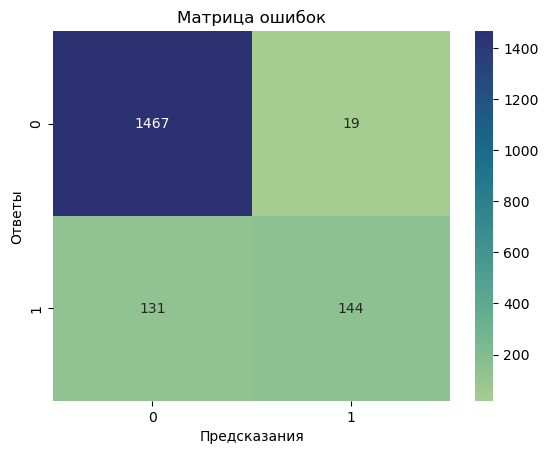

In [109]:
# Матрица ошибок.
matrix = confusion_matrix(target_test, xgb_best_model[0].predict(features_test_ohe_scaler))
sns.heatmap(matrix, fmt='g', annot=True, cmap='crest')
plt.title('Матрица ошибок')
plt.xlabel('Предсказания')
plt.ylabel('Ответы')
plt.show();

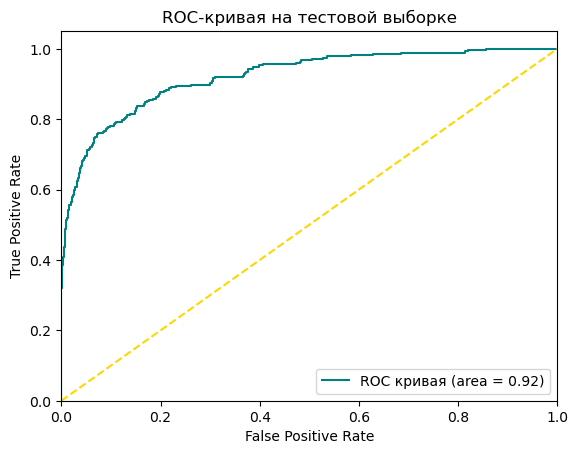

In [110]:
# Добавим график ROC-кривой на тестовой выборке.
fpr, tpr, treshold = roc_curve(target_test, probabilities_one_xgb_test)
plt.plot(fpr, tpr, color='teal', label='ROC кривая (area = %0.2f)' % roc_auc_xgb_test)
plt.plot([0, 1], [0, 1], color='gold', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая на тестовой выборке')
plt.legend(loc="lower right")
plt.show()

ROC-кривая является графическим представлением зависимости между долей верных положительных классификаций (True Positive Rate) и долей ложных положительных классификаций (False Positive Rate). Чем ближе ROC-кривая к верхнему левому углу (ближе к единице AUC-ROC), тем выше качество классификации модели. Значение 0.92 AUC-ROC говорит о том, что модель XGBClassifier показывает хорошие результаты в классификации объектов на тестовой выборке.

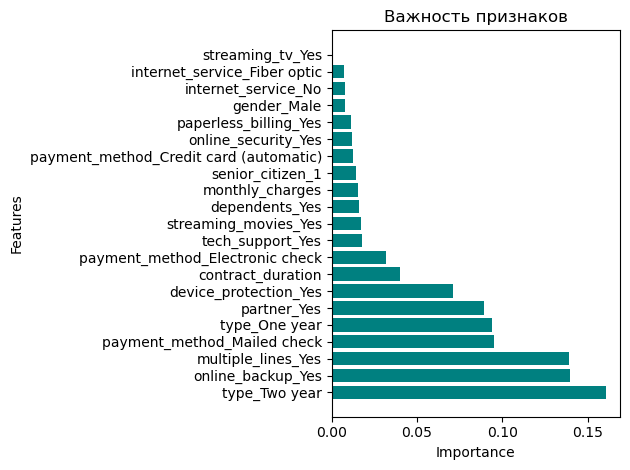

In [111]:
# Важность признаков.
feature_importances = xgb_best_model[0].feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = np.array(features_test_ohe.columns)[sorted_indices]
plt.barh(sorted_features, sorted_importances, color='teal')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Важность признаков')
plt.tight_layout()
plt.show()

Можно установить порог важности, ниже которого признаки будут исключены из модели. Например, изначально оставить только те признаки, значимость которых выше 0.1 - 3 признака или 0.5 - 7 признаков, а затем оценить производительность модели.

### 5.3. Вывод

- Проверили качество лучшей модели на тестовой выборке.
  - AUC-ROC лучшей модели XGBClassifier на тестовой выборке: 0.92
  - Accuracy лучшей модели XGBClassifier на тестовой выборке: 0.91
- Проверили модель на адекватность с помощью DummyClassifier.
- Добавим график ROC-кривой на тестовой выборке.
- Исследовали значимость признаков.

## 6. Общий вывод

Провели исследование и построили модель машинного обучения, которая поможет прогнозировать отток клиентов.

Выполненные шаги и наблюдения:
- Таблицы имеют разные размеры.
- Всего в выборке представлены договоры с 7043 клиентами, из которых используют интернет - 5517, используют телефон - 6361.
- В таблицах отсутствуют пропуски и явные дубликаты.
- Признаки MonthlyCharges и SeniorCitizen имеют числовой тип данных, остальные признаки имеют тип данных object.
- Все значения признака customerID - уникальны, что даёт возможность объединенить выбороки по этому признаку с использованием метода merge.
С 2016 года увеличивается количество новых договоров и отток клиентов. Предположения:
1. Возможно была запущена акция с выгодной ценой, но с повышением стоимости после определенного периода.
2. Ухудшение условий - повышение стоимости или снижение качества предоставляемых услуг при активном маркетинге.

- Выбороки объединены. 
- Признаки добавлены и удалены. 
- Признаки переименованы.
- Пропуски заполнены.
- Типы данных изменены.
- Признаки преобразованы.
- Исследованы численные и категориальные признаки.
- Удалены мультиколлинеарные признаки.
- Выявлен дисбаланс классов. В качестве основной метрики мы будем использовать AUC-ROC, которая не чувствительна к дисбалансу классов.
- Выявлены и удалены мультиколлинеарные признаки.
- Разделили данные на выборки.
- Масштабировали признаки.
- Построили и обучили три модели.
- Подобрали гиперпараметры.
- проверили модель на адекватность с помощью DummyClassifier
- Проверили качество лучшей модели на тестовой выборке.
- Добавим график ROC-кривой на тестовой выборке.
- Исследовали значимость признаков.

- В качестве лучшей модели выбрали XGBClassifier, так как значение метрики AUC-ROC у неё выше остальных.
- Лучшая модель XGBClassifier на обучающей выборке имеет следующие значения:
  - AUC-ROC = 0.91
  - Accuracy = 0.91
  - Параметры: max_depth = 2, n_estimators = 450
- Лучшая модель XGBClassifier на тестовой выборке имеет следующие значения:
  - AUC-ROC = 0.92
  - Accuracy = 0.91

Результаты исследования позволят оператору связи выяснить, каким пользователям нужно будет предлагать промокоды и специальные условия.

## 7. Отчет по работе.

**Все этапы важны.**

*Исследование данных:*
   - Размеры таблиц, уникальные значения, пропуски, дубликаты.

*Анализ данных и подготовка признаков.*
   - Объединение таблиц с помощью merge по уникальному признаку customerID.
   - Заполнение пропусков.
     - Заменили пропуски значением No.
     - Для No установили заглушку, соответствующую дате загрузке датасета - 2020-02-01.
   - Изменение типов данных. senior_citizen на object, total_charges в числовой формат, begin_date в даты.
   - Преобразование признаков. Добавили в датасет два новый признака:
     - Целевой признак - customer_outflow, который принимает значения: 1 - клиент ушёл, 0 - клиент остался.
     - Признак contract_duration - длительность договора.
   - Исследование и визуализация признаков.
     - Построили матрицу корреляции признаков.
     - Удалили признаки которые имеют высокую корреляцию с contract_duration: begin_date и total_charges.
     - Удалили end_date - этот признак мы заменили на customer_outflow.



*Построение и обучение моделей.*
   - Разделение данных на выборки.
     - Выделили из датасета целевой признак target - customer_outflow и оставшиеся признаки features.
     - Разделили полученые данные на обучающую и тестовую выборки.
     - Сбросили индексы.
   - Кодирование и масштабирование признаков.
     - Кодирование категориальных признаков с помощью OneHotEncoder.
     - Масштабирование численных признаков с помощью StandardScaler.
     - Преобразовали тип данных в integer.
   - Построение и обучение моделей.
     - Используем KFold для кросс-валидации с 3 фолдами (частями), использованием заранее заданного случайного состояния RANDOM_STATE и перемешиванием shuffle данных перед разделением на фолды.
     - Функция для обучения моделей с помощью GridSearchCV. Подробное описание функции ниже.
     - Модели: DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, CatBoostClassifier, LGBMClassifier,       GradientBoostingClassifier и XGBClassifier.
   - Подбор гиперпараметров.
   - Выбор лучшей модели.
   
*Тестирование лучшей модели.*
   - Проверили на тестовой выборке качество выбранной модели XGBClassifier
   - Проверили модель на адекватность с помощью DummyClassifier.
   - Добавили график ROC-кривой на тестовой выборке.
   - Исследовали важность признаков.

In [112]:
RANDOM_STATE = 310723
TEST_SIZE = 0.25

In [113]:
# Список признаков, которые использовались для обучения. target - customer_outflow
print(features_train_ohe_scaler.columns)

Index(['monthly_charges', 'contract_duration', 'type_One year',
       'type_Two year', 'paperless_billing_Yes',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'gender_Male', 'senior_citizen_1', 'partner_Yes', 'dependents_Yes',
       'internet_service_Fiber optic', 'internet_service_No',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes',
       'multiple_lines_Yes'],
      dtype='object')


In [114]:
# Итоговая модель и ее гиперпараметры: max_depth = 2, n_estimators = 450
#xgb_parameters = {'max_depth': range(2, 10, 2), 'n_estimators': range(50, 500, 50)}
#xgb_best_model = fit_model(estimator=XGBClassifier(random_state=RANDOM_STATE),
#    param_grid=xgb_parameters, features_train=features_train_ohe_scaler, target_train=target_train)
print(xgb_best_model[0])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=450, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=310723, ...)


**Функция для обучения моделей**

Функция fit_model принимает следующие аргументы:

- estimator - оценщик модели, который будет использоваться для поиска наилучших параметров
- param_grid - сетка параметров модели, среди которых будет производиться поиск наилучших
- features_train - признаки тренировочных данных
- target_train - целевая переменная тренировочных данных

Далее выполняются следующие действия:

1. Создается объект model класса GridSearchCV с аргументами:

- estimator=estimator - оценщик модели
- param_grid=param_grid - сетка параметров модели
- cv=kfold - количество фолдов для перекрестной проверки
- scoring=['roc_auc', 'accuracy'] - метрики, на основе которых будет оценка модели
- refit='roc_auc' - метрика, на основе которой будет выбрана наилучшая модель в конце

2. Модель model обучается на тренировочных данных features_train и target_train с помощью метода fit.

3. Получается индекс наилучшей модели с помощью атрибута best_index_ у модели model.

4. Рассчитывается значение best_roc_auc как округленное до двух знаков после запятой значение наилучшей оценки модели.

5. Рассчитывается значение best_accuracy как округленное до двух знаков после запятой значение средней оценки модели по метрике "accuracy" в массиве cv_results_ на позиции best_index.

6. Выводится на экран значение best_roc_auc в формате "AUC-ROC: {best_roc_auc}".

7. Выводится на экран значение best_accuracy в формате "Accuracy: {best_accuracy}".

8. Выводятся на экран значения выбранных параметров модели model.best_params_ в формате "Parameters: {model.best_params_}".

**Отклонения от плана.**

Все шаги были выполнены. В четвертом пункте плана Построение и обучение моделей:
- Объединили два подпункта: Подбор гиперпараметров и Выбор лучшей модели.
- Добавили: Кодирование и масштабирование признаков.


**Основные затруднения:**
1. Кодирование и масштабирование признаков.
2. Фунция для обучения моделей.


**Добавили в датасет два признака:**
  1. Целевой признак - customer_outflow, который принимает значения: 1 - клиент ушёл, 0 - клиент остался.
  2. Признак contract_duration - длительность договора.

**Факторы влиящие на метрики машинного обучения:**

1. Качество и разнообразие данных: Качество и разнообразие данных играют ключевую роль в обучении модели машинного обучения. Чем больше и лучше данные, тем лучше результаты модели. Отсутствие или недостаток данных может привести к низким метрикам.

2. Алгоритмы и модели: Выбор подходящего алгоритма или модели также существенно влияет на метрики машинного обучения. Разные алгоритмы и модели могут иметь разную точность и полноту, что отражается в метриках.

3. Параметры модели: Оптимальные параметры модели также оказывают влияние на метрики. Неправильно настроенные параметры могут привести к низкому качеству модели и плохим метрикам.

4. Предварительная обработка данных: Хорошая предварительная обработка данных, включая масштабирование, устранение выбросов, обработку пропущенных значений и кодирование категориальных признаков, может улучшить метрики модели.

5. Разделение данных на обучающую и тестовую выборки: Правильное разделение данных на обучающую и тестовую выборки позволяет оценить обобщающую способность модели на новых данных. Неправильное разделение может привести к переобучению или недообучению модели.

6. Объекты для обучения модели: Качество объектов, используемых для обучения модели, оказывает влияние на метрики. Если объекты не хорошо представляют классы, то модель может давать плохие результаты.

7. Особенности задачи: Метрики машинного обучения также зависят от самой задачи. Например, в задачах классификации точность и полнота являются важными метриками, а в задачах регрессии среднеквадратичная ошибка может быть основной метрикой.

Все эти факторы взаимодействуют и влияют на метрики машинного обучения. Чтобы улучшить метрики, важно тщательно выбирать и обрабатывать данные, выбирать подходящие алгоритмы и модели, настраивать параметры модели, корректно разделять данные и т.д.

**Существует несколько способов повысить AUC-ROC с помощью параметров XGBClassifier:**

1. max_depth (int): Увеличьте max_depth, чтобы разрешить модели использовать более сложные деревья. Более глубокие деревья имеют больше шансов захватить более сложные паттерны в данных.

2. n_estimators (int): Увеличьте количество деревьев, чтобы улучшить модель. Больше деревьев могут привести к лучшей обобщающей способности и повышению AUC-ROC.

3. learning_rate (float): Установите более низкую learning_rate, чтобы снизить влияние каждого дерева на итоговое предсказание. Это поможет более аккуратно обучить модель.

4. min_child_weight (int): Увеличивайте min_child_weight, чтобы уменьшить переобучение модели. Этот параметр помогает контролировать степень, при которой модель будет разветвляться в деревьях.

5. subsample (float): Установите значение меньше 1, чтобы использовать случайное подмножество обучающих данных для каждого дерева. Это может помочь снизить влияние шума в данных и сделать модель более устойчивой.

6. colsample_bytree (float): Установите значение меньше 1, чтобы использовать случайное подмножество признаков для каждого дерева. Это может помочь модели быть более устойчивой к шуму в данных.

7. reg_alpha (float) и reg_lambda (float): Параметры регуляризации, которые помогут снизить переобучение. Увеличение значения этих параметров увеличит силу регуляризации.

**XGBClassifier.**

XGBClassifier - это классификатор, основанный на алгоритме градиентного бустинга, известном как XGBoost. Этот классификатор является одним из вариантов реализации градиентного бустинга в библиотеке XGBoost.

XGBClassifier использует ансамбль деревьев решений, где каждое дерево обучается на предыдущей ошибках модели для минимизации функции потерь. Во время обучения XGBClassifier выбирает оптимальные разделения для создания деревьев, что позволяет достичь высокой точности и эффективности классификации.

Кроме того, XGBClassifier обладает рядом особенностей, делающих его популярным выбором для задач классификации. У него есть возможность обработки различных типов данных, включая категориальные признаки, а также поддержка параллельного обучения и распределенного вычисления, что позволяет эффективно обрабатывать большие объемы данных.

XGBClassifier также обладает гибкостью в настройке гиперпараметров, что позволяет адаптировать модель под конкретные требования и данные.

В целом, XGBClassifier является мощным инструментом для задач классификации, который обеспечивает высокую точность и эффективность обработки данных.